In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.plyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
image_size = (256, 256)
img_width, img_height = 256, 256
batch_size = 32
epochs = 1

In [3]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


94765736/94765736 [==============================] - 3s 0us/step


In [4]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

In [5]:
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
for layer in base_model.layers:
    layer.trainable = False


In [7]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
c = 1

In [9]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/tomato/n_train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
b = 2.1

Found 11105 images belonging to 6 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/tomato/n_val',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
a = 1.8

Found 2495 images belonging to 6 classes.


In [11]:
test_generator = train_datagen.flow_from_directory(
    '/kaggle/input/tomato/n_test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 280 images belonging to 6 classes.


In [13]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
histoty = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

/tmp/ipykernel_43/1417540220.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  histoty = model.fit_generator(


Epoch 1/50
347/347 [==============================] - 220s 606ms/step - loss: 1.7125 - accuracy: 0.3018 - val_loss: 1.5053 - val_accuracy: 0.3612
Epoch 2/50
347/347 [==============================] - 166s 477ms/step - loss: 1.4324 - accuracy: 0.4167 - val_loss: 1.4947 - val_accuracy: 0.3985
Epoch 3/50
347/347 [==============================] - 166s 479ms/step - loss: 1.2911 - accuracy: 0.4851 - val_loss: 1.2696 - val_accuracy: 0.4955
Epoch 4/50
347/347 [==============================] - 167s 480ms/step - loss: 1.1862 - accuracy: 0.5298 - val_loss: 1.6560 - val_accuracy: 0.3657
Epoch 5/50
347/347 [==============================] - 166s 478ms/step - loss: 1.1493 - accuracy: 0.5521 - val_loss: 1.2749 - val_accuracy: 0.5394
Epoch 6/50
347/347 [==============================] - 164s 474ms/step - loss: 1.1086 - accuracy: 0.5663 - val_loss: 1.1219 - val_accuracy: 0.5678
Epoch 7/50
347/347 [==============================] - 164s 472ms/step - loss: 1.0570 - accuracy: 0.5877 - val_loss: 1.0968 -

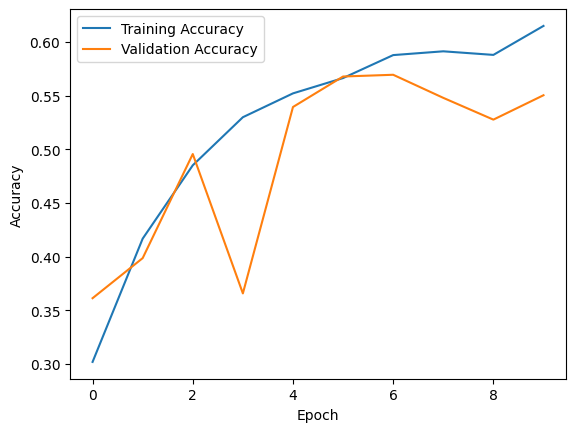

In [17]:
import matplotlib.pyplot as plt
plt.plot(histoty.history['accuracy'], label='Training Accuracy')
plt.plot(histoty.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:

import seaborn as sns

# Predict classes for the validation set
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

9/9 [==============================] - 7s 681ms/step


In [34]:
true_positives = np.sum((y_pred == 1) & (y_true == 1))
false_positives = np.sum((y_pred == 1) & (y_true == 0))
false_negatives = np.sum((y_pred == 0) & (y_true == 1))
true_negatives = np.sum((y_pred == 0) & (y_true == 0))




# Calculate Accuracy
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives + 1e-9)

# Calculate Precision
precision = true_positives / (true_positives + false_positives + 1e-9)

# Calculate Recall
recall = true_positives / (true_positives + false_negatives + 1e-9)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)

# Print the results
print("CNN_Accuracy: {:.2%}".format(accuracy))
print("CNN_Precision: {:.2%}".format(precision))
print("CNN_Recall: {:.2%}".format(recall))
print("CNN_F1 Score: {:.2%}".format(f1_score))

CNN_Accuracy: 94.29%
CNN_Precision: 98.00%
CNN_Recall: 77.78%
CNN_F1 Score: 86.73%


1/1 [==============================] - 1s 915ms/step


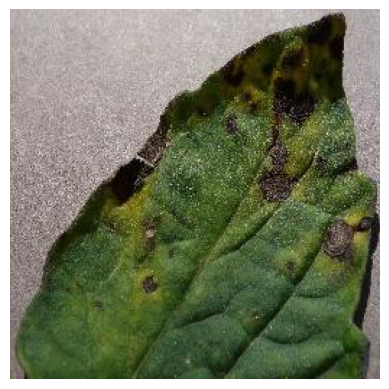

Predicted Class: 3 (Index: 3), Confidence: 51.09%


In [17]:
image_path = '/kaggle/input/tomato-dataset/n_val/Tomato_Early Blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG'  # Replace with the path to your test image

# Load and preprocess the image
image_size = (256, 256)

image_size = (256, 256)

# Load and preprocess the image
img = image.load_img(image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to [0, 1]

# Make a prediction
predictions = model.predict(img_array)

# Decode the prediction
class_index = np.argmax(predictions[0])
class_label = str(class_index)  # You might have a mapping of class indices to labels
confidence = predictions[0][class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the prediction result
print("Predicted Class: {} (Index: {}), Confidence: {:.2f}%".format(class_label, class_index, confidence * 100))

1/1 [==============================] - 0s 23ms/step


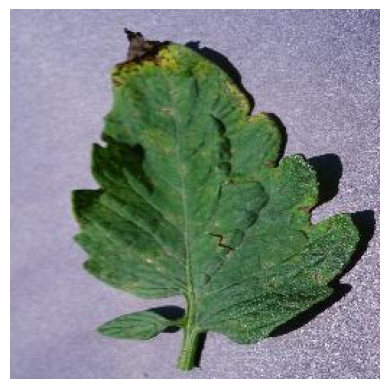

Predicted Class: 1 (Index: 1), Confidence: 39.51%


In [18]:
image_path = '/kaggle/input/tomato-dataset/n_val/Tomato_Septoria Leaf Spot/021f9747-f308-4694-859b-10f541a0e63c___JR_Sept.L.S 2506.JPG'  # Replace with the path to your test image

# Load and preprocess the image
image_size = (256, 256)

image_size = (256, 256)

# Load and preprocess the image
img = image.load_img(image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to [0, 1]

# Make a prediction
predictions = model.predict(img_array)

# Decode the prediction
class_index = np.argmax(predictions[0])
class_label = str(class_index)  # You might have a mapping of class indices to labels
confidence = predictions[0][class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the prediction result
print("Predicted Class: {} (Index: {}), Confidence: {:.2f}%".format(class_label, class_index, confidence * 100))

1/1 [==============================] - 0s 23ms/step


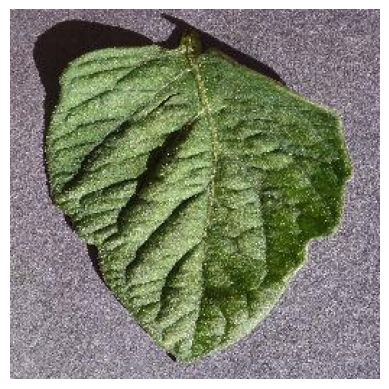

Predicted Class: 2 (Index: 2), Confidence: 100.00%


In [19]:
image_path = '/kaggle/input/tomato-dataset/n_val/Tomato_Healthy/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223_flipTB.JPG'  # Replace with the path to your test image

# Load and preprocess the image
image_size = (256, 256)

image_size = (256, 256)

# Load and preprocess the image
img = image.load_img(image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to [0, 1]

# Make a prediction
predictions = model.predict(img_array)

# Decode the prediction
class_index = np.argmax(predictions[0])
class_label = str(class_index)  # You might have a mapping of class indices to labels
confidence = predictions[0][class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the prediction result
print("Predicted Class: {} (Index: {}), Confidence: {:.2f}%".format(class_label, class_index, confidence * 100))